#                                          INDIAN FOOD DATA ANALYSIS

### Basic python packages load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

### Load the dataset

In [2]:
food=pd.read_csv('indian_food.csv')

## Exploratory Data Analysis

### Checking loaded data from the dataset

In [7]:
food.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [8]:
#View first five rows
food.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [10]:
#view last 5 rows
food.tail()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central
254,Pinaca,"Brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West


### Checking if any value in the data frame is null

In [11]:
#Checking Info
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [35]:
#Null Value Check
food.isnull().sum()         

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

### Number of columns and rows of dataset

In [17]:
#Shape of the data
row,col=food.shape
print("There are total {}".format(row),"rows and {}".format(col),"columns in the dataset")

There are total 255 rows and 9 columns in the dataset


### Summary of numeric and categorical variables

In [4]:
food.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [5]:
#Descriptive summary for numeric and categorical variables
food.describe(include="all")

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
count,255,255,255,255.000000,255.000000,255,255,255,254
unique,255,252,2,NaN,NaN,5,4,25,7
top,Balu shahi,"Gram flour, ghee, sugar",vegetarian,NaN,NaN,spicy,main course,Gujarat,West
freq,1,2,226,NaN,NaN,133,129,35,74
mean,NaN,NaN,NaN,31.105882,34.529412,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,72.554409,48.265650,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,10.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,10.000000,30.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,20.000000,40.000000,NaN,NaN,NaN,NaN


### Variable type in the data frame.

In [16]:
food.dtypes

name              object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state             object
region            object
dtype: object

## Q1) Display the Number of distinct flavor dishes within the dataset.

In [3]:
food.flavor_profile.value_counts()

flavor_profile
spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: count, dtype: int64

## Q2) Explore the distribution of dishes across different regions using a bar chart.


In [7]:
import plotly.express as px
fig = px.bar(food, x='region', title='Distribution of Dishes Across Regions')
fig.show()

## Q3) List the quantity of distinct foods found in each state.

In [44]:
state_dish_counts = food.groupby('state')['name'].nunique()
print(state_dish_counts)

state
-1                 24
Andhra Pradesh     10
Assam              21
Bihar               3
Chhattisgarh        1
Goa                 3
Gujarat            35
Haryana             1
Jammu & Kashmir     2
Karnataka           6
Kerala              8
Madhya Pradesh      2
Maharashtra        30
Manipur             2
NCT of Delhi        1
Nagaland            1
Odisha              7
Punjab             32
Rajasthan           6
Tamil Nadu         20
Telangana           5
Tripura             1
Uttar Pradesh       9
Uttarakhand         1
West Bengal        24
Name: name, dtype: int64


## Q4) Show a graphical depiction of the dishes according to the meal's course.

<Axes: xlabel='course', ylabel='count'>

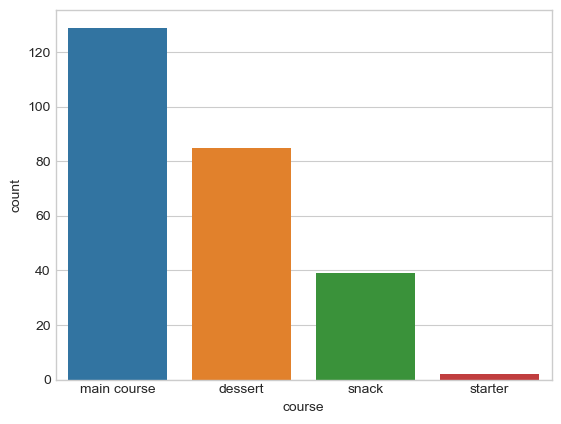

In [33]:
sns.countplot(x="course",data=food,order=food['course'].value_counts().index)

## Q5) Show the average time spent preparing the food.

In [45]:
avg_prep_time=food['prep_time'].mean()
print(f'Average Preparation Time: {avg_prep_time} minutes')

Average Preparation Time: 31.105882352941176 minutes


## Q6) Investigate the distribution of dishes for each diet category.


In [5]:
fig = px.histogram(food, x='diet', color='diet', title='Distribution of Dishes for Each Diet Category')
fig.show()

## Q7) List all the food items with names that take more than 30 minutes to get cooked.

In [47]:
print(food[food.cook_time>30][['cook_time','name']])              

     cook_time               name
2           60     Gajar ka halwa
4           40        Gulab jamun
5           50             Imarti
6           50             Jalebi
9           40              Kheer
..         ...                ...
233         60               Goja
235         40           Haq Maas
247         50  Prawn malai curry
251         60            Bebinca
253         45          Mawa Bati

[96 rows x 2 columns]


## Q8) Show the distribution of flavors in a pie chart.


In [6]:
fig = px.pie(food, names='flavor_profile', title='Flavor Profile Distribution')
fig.show()

## Q9) Display the list of all the vegetarian cuisine from the northern area.

In [57]:
north_vegeterian = food[(food['region'] == 'North') & (food['diet'] == 'vegetarian')][['name','region']]
print(north_vegeterian)                

                             name region
2                  Gajar ka halwa  North
6                          Jalebi  North
11                          Lassi  North
13                          Petha  North
15                          Rabri  North
17                        Singori  North
18                    Sohan halwa  North
27                        Malapua  North
68                      Aloo gobi  North
69                     Aloo tikki  North
70                     Aloo matar  North
71                     Aloo methi  North
72              Aloo shimla mirch  North
73                        Bhatura  North
74                  Bhindi masala  North
77                   Chana masala  North
82                  Chole bhature  North
85                   Dal makhani   North
86                      Dal tadka  North
87                       Dum aloo  North
90                        Kachori  North
91                   Kadai paneer  North
92                   Kadhi pakoda  North
93              

## Q10) Draw a line graph showing the trend of preperation time across the various regions.

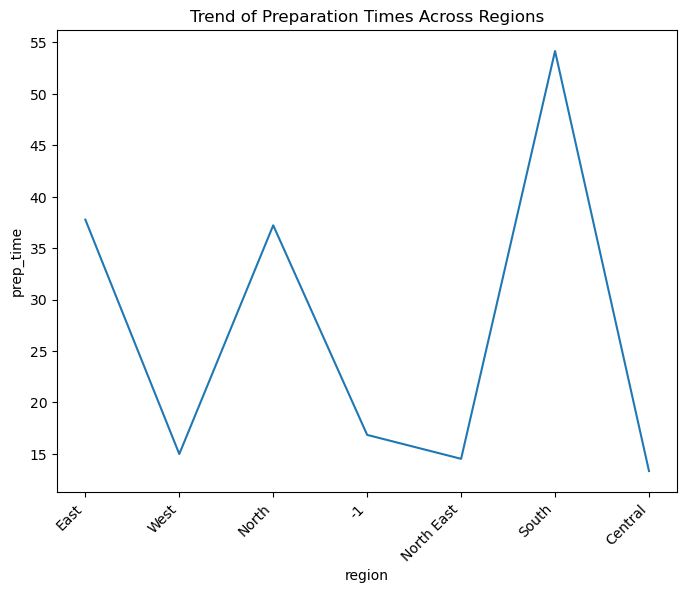

In [10]:
plt.figure(figsize=(8,6))
sns.lineplot(data=food, x='region', y='prep_time',err_style=None) 
plt.title('Trend of Preparation Times Across Regions')
plt.xticks(rotation=45, ha='right')
plt.show()

## Q11) Display the top 5 states using a bar chart that have the most number of dishes.

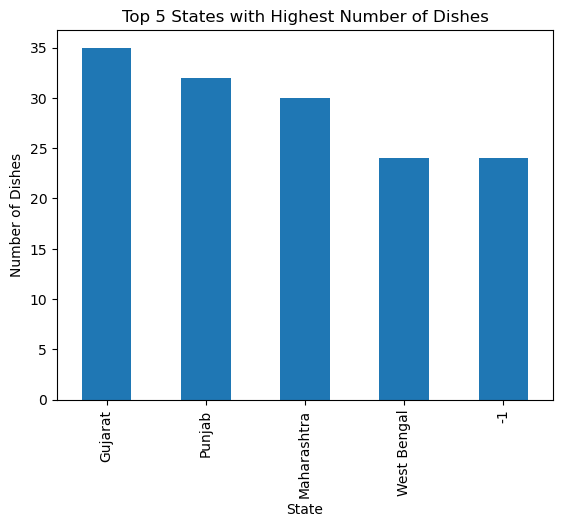

In [51]:
top_states_dishes = food['state'].value_counts().nlargest(5)
top_states_dishes.plot(kind='bar')
plt.title('Top 5 States with Highest Number of Dishes')
plt.xlabel('State')
plt.ylabel('Number of Dishes')
plt.show()

## Q12) Present a minimum of ten dishes that take the longest to prepare, and in a similar vein, present ten recipes that take the longest to cook.

In [52]:
top_preparation_time = food.nlargest(10, 'prep_time')[['name', 'prep_time']]
top_preparation_time1 = food.nlargest(10, 'cook_time')[['name', 'cook_time']]
print(top_preparation_time)
print()
print(top_preparation_time1)

                    name  prep_time
114          Pindi chana        500
155                Puttu        495
29             Misti doi        480
128                 Dosa        360
130                 Idli        360
144          Masala Dosa        360
48              Poornalu        240
66        Chak Hao Kheer        240
122     Tandoori Chicken        240
123  Tandoori Fish Tikka        240

                  name  cook_time
62           Shrikhand        720
27             Malapua        120
75             Biryani        120
114        Pindi chana        120
34            Rasgulla         90
83   Daal baati churma         90
115       Rajma chaval         90
128               Dosa         90
130               Idli         90
142       Kuzhakkattai         90


## Q13) Show how long preparation takes in relation to cooking time with a bar plot.


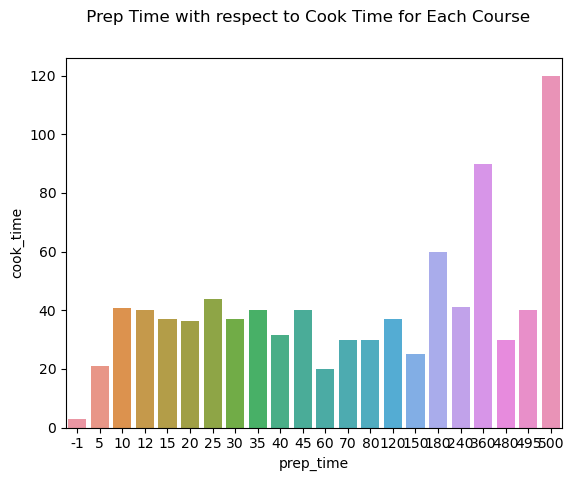

In [13]:
sns.barplot(data=food, x='prep_time', y='cook_time', errorbar=None)
plt.suptitle(' Prep Time with respect to Cook Time for Each Course')
plt.show()

## Q14) Display a scatter plot of preperation times against cook times with color                       differentiation based on diet.


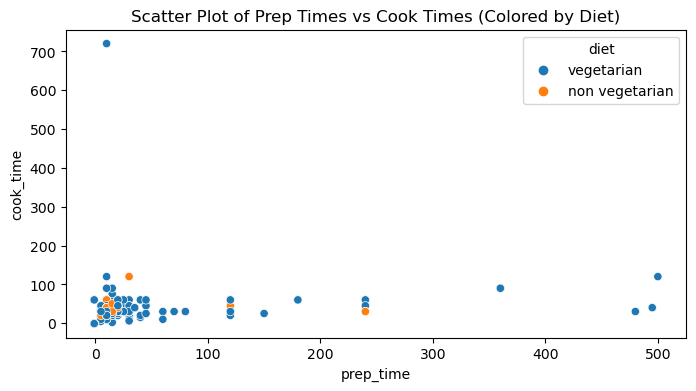

In [18]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=food, x='prep_time', y='cook_time', hue='diet')      
plt.title('Scatter Plot of Prep Times vs Cook Times (Colored by Diet)')
plt.show()

## Q15) Analyze the distribution of prep times for each flavor profile.


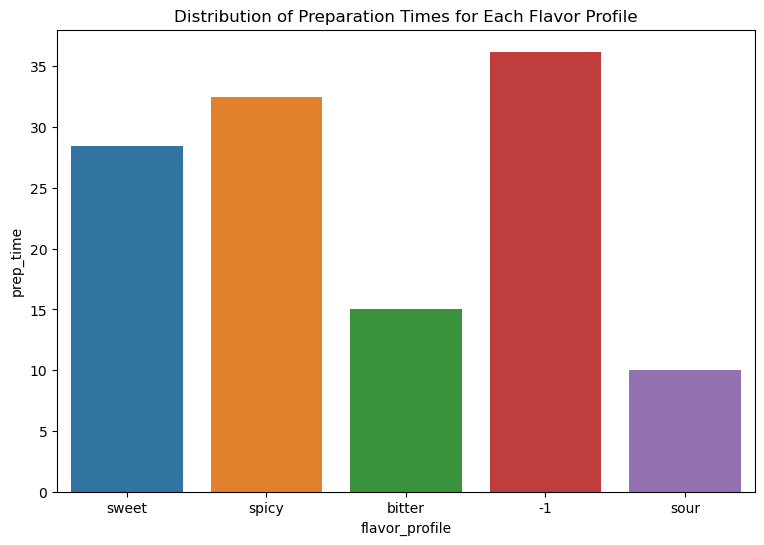

In [19]:
plt.figure(figsize=(9, 6))
sns.barplot(data=food, x='flavor_profile', y='prep_time',errorbar=None)
plt.title('Distribution of Preparation Times for Each Flavor Profile')
plt.show()